Referfence: https://www.tensorflow.org/tutorials/text/word_embeddings  
チュートリアル：単語埋め込み (Word embeddings) をやってみる

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds

tfds.disable_progress_bar()

In [3]:
embedding_layer = layers.Embedding(1000, 5)

In [5]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[ 0.04274375,  0.00798801, -0.02126303, -0.00185336, -0.00862424],
       [-0.01139174,  0.01133285,  0.04353842,  0.00194588,  0.00565413],
       [ 0.03755077, -0.0173861 ,  0.00283957, -0.02159837, -0.01598278]],
      dtype=float32)

In [6]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
print(result.shape)
print(result.numpy())

(2, 3, 5)
[[[ 0.00213629 -0.00188404 -0.00440028  0.01654151  0.010339  ]
  [ 0.04274375  0.00798801 -0.02126303 -0.00185336 -0.00862424]
  [-0.01139174  0.01133285  0.04353842  0.00194588  0.00565413]]

 [[ 0.03755077 -0.0173861   0.00283957 -0.02159837 -0.01598278]
  [ 0.04885966 -0.03563322  0.01595589 -0.0317856  -0.02394896]
  [-0.03013598  0.01853391  0.02453789 -0.01103812  0.01240047]]]


In [7]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWHNB4X/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWHNB4X/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWHNB4X/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [8]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [10]:
info.features.keys()

dict_keys(['text', 'label'])

In [15]:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/features/ClassLabel
print(info.features['label'].names)
print(info.features['label'].num_classes)

['neg', 'pos']
2


In [16]:
train_data

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [17]:
#train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=([None],[]))
train_batches = train_data.shuffle(1000).padded_batch(10)
#test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=([None],[]))
test_batches = test_data.shuffle(1000).padded_batch(10)

In [18]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[6313,    1, 4609, ...,    0,    0,    0],
       [ 147,    1, 5302, ...,    0,    0,    0],
       [  12,  281,  196, ...,    0,    0,    0],
       ...,
       [2079,   36, 7998, ...,    0,    0,    0],
       [8002, 7968,  123, ...,    0,    0,    0],
       [  12,   31,   93, ...,    0,    0,    0]])

In [19]:
train_labels.numpy()

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [21]:
train_batch.shape

TensorShape([10, 717])

In [22]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5162 - accuracy: 0.6920 - val_loss: 0.3524 - val_accuracy: 0.8350
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2898 - accuracy: 0.8794 - val_loss: 0.3286 - val_accuracy: 0.8600
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2335 - accuracy: 0.9074 - val_loss: 0.4139 - val_accuracy: 0.8200
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2007 - accuracy: 0.9228 - val_loss: 0.3654 - val_accuracy: 0.8900
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1756 - accuracy: 0.9334 - val_loss: 0.4929 - val_accuracy: 0.8300
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1599 - accuracy: 0.9426 - val_loss: 0.4525 - val_accuracy: 0.8500
Epoch 7/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1440 - accuracy: 0.9478 - val_loss: 0.4507 - val_ac

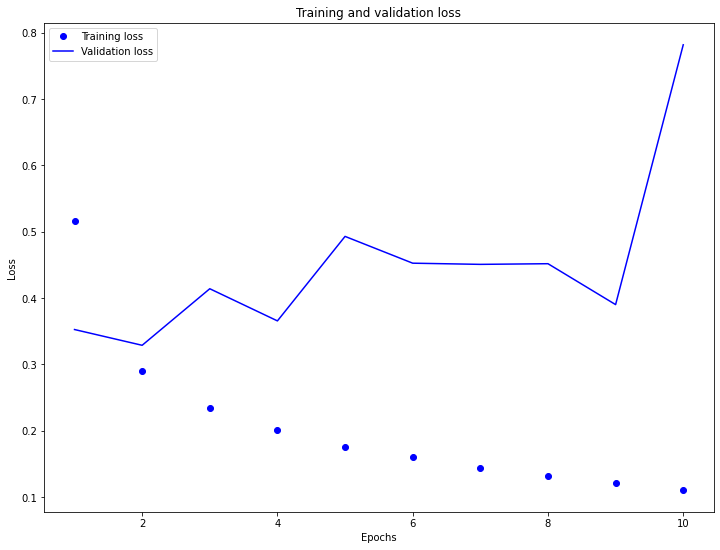

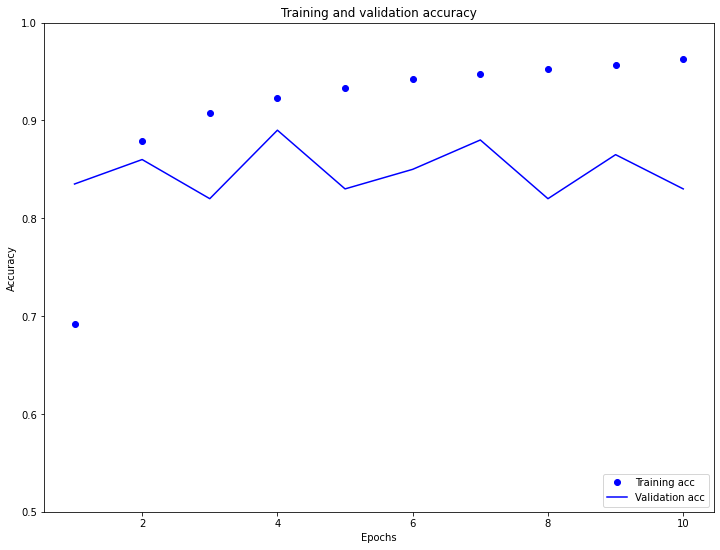

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [25]:
e = model.layers[0]
weights = e.get_weights()[0]

print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [26]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # 0 はパディングのためスキップ
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")

out_v.close()
out_m.close()

In [27]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>